In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('BTC_USD_Price_Prediction_Data.csv')

In [4]:
data.head()

,Unnamed: 0,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,0,BTC,2014-03-14,124.65499,125.30466,125.75166,123.56349
1,1,BTC,2014-03-15,126.45500,124.65499,126.75850,124.63383
2,2,BTC,2014-03-16,109.58483,126.45500,126.66566,84.32833
3,3,BTC,2014-03-17,119.67466,109.58483,119.67500,108.05816
4,4,BTC,2014-03-18,122.33866,119.67466,122.93633,119.00566


In [5]:
data.shape

(2787, 7)

In [6]:
# To check is there is any null data on the dataset
data.isnull().sum()

Unnamed: 0             0
Currency               0
Date                   0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [7]:
del data['Unnamed: 0']

In [8]:
data.columns

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Date                 2787 non-null   object 
 2   Closing Price (USD)  2787 non-null   float64
 3   24h Open (USD)       2787 non-null   float64
 4   24h High (USD)       2787 non-null   float64
 5   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(2)
memory usage: 130.8+ KB


In [10]:
data.Currency.unique()

array(['BTC'], dtype=object)

In [11]:
data.Date.unique()

array(['2014-03-14', '2014-03-15', '2014-03-16', ..., '2021-10-27',
       '2021-10-28', '2021-10-29'], dtype=object)

In [12]:
data['24h High (USD)'].unique()

array([  125.75166   ,   126.7585    ,   126.66566   , ...,
       50691.80294954, 49671.41417381, 46623.85343748])

In [13]:
data['24h High (USD)'].nunique()

2787

In [14]:
data.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6530.845141,6514.579485,6711.061683,6303.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,109.584830,109.584830,119.675000,84.328330
25%,461.087500,460.400500,470.720995,451.818830
50%,2781.182500,2773.367500,2875.696250,2697.457500
75%,8507.923720,8497.887593,8764.291985,8222.060570
max,63347.789035,63563.673545,64802.787870,62095.632914


In [15]:
data.corr()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Closing Price (USD),1.000000,0.998892,0.999527,0.999403
24h Open (USD),0.998892,1.000000,0.999476,0.999096
24h High (USD),0.999527,0.999476,1.000000,0.999028
24h Low (USD),0.999403,0.999096,0.999028,1.000000


# Data visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2014-03-14,124.65499,125.30466,125.75166,123.56349
1,BTC,2014-03-15,126.45500,124.65499,126.75850,124.63383
2,BTC,2014-03-16,109.58483,126.45500,126.66566,84.32833
3,BTC,2014-03-17,119.67466,109.58483,119.67500,108.05816
4,BTC,2014-03-18,122.33866,119.67466,122.93633,119.00566


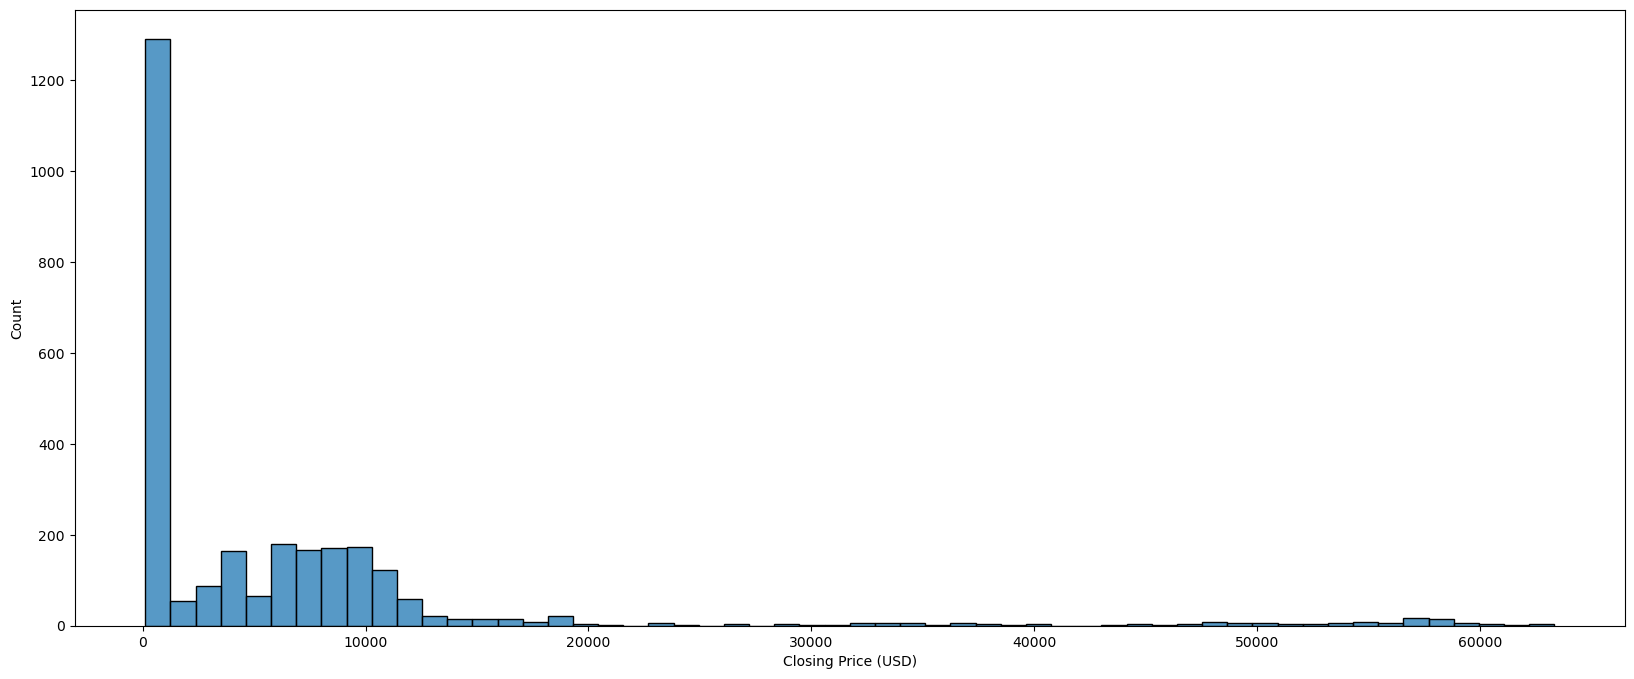

In [18]:
plt.figure(figsize=(20,8))
sns.histplot(data, x='Closing Price (USD)')
plt.show()

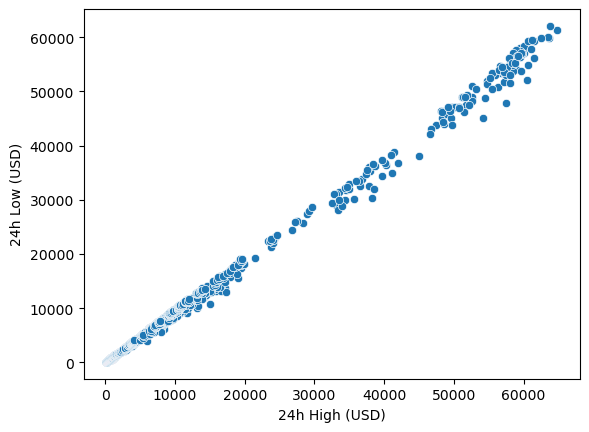

In [19]:
sns.scatterplot(x=data['24h High (USD)'], y=data['24h Low (USD)'])
plt.show()

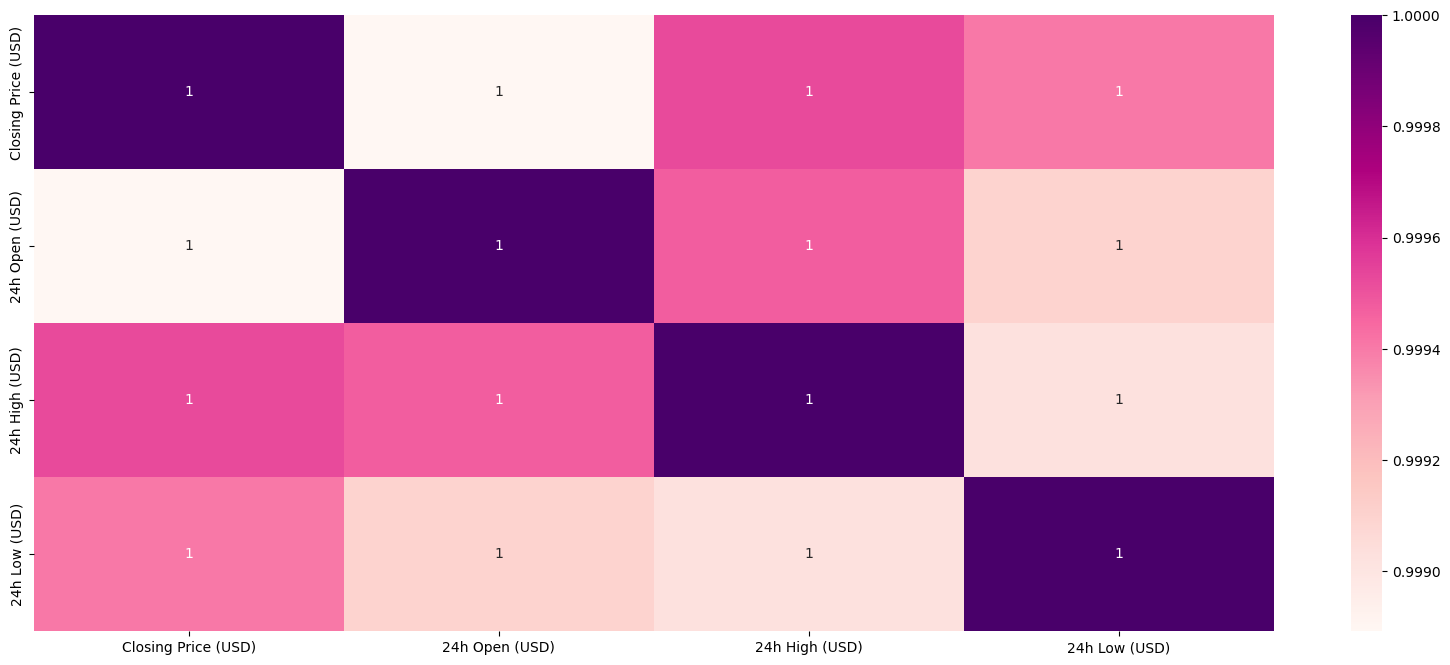

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, cmap='RdPu')
plt.show()

# Implementing algorithm

In [21]:
data.columns

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

In [22]:
del data['Currency']
del data['Date']

In [23]:
data.columns

Index(['Closing Price (USD)', '24h Open (USD)', '24h High (USD)',
       '24h Low (USD)'],
      dtype='object')

In [24]:
X = data.drop(labels=['Closing Price (USD)'], axis=1)
y = data['Closing Price (USD)']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2090, 3) (2090,) (697, 3) (697,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Implementing LinearRegression

In [28]:
LinR = LinearRegression()
LinR.fit(X_train, y_train)

LinearRegression()

In [29]:
predicted_LinR = LinR.predict(X_test)
print('R2score of the Linear Regression is',r2_score(y_test,predicted_LinR))

print('Mean absolute error  of the Linear Regression is',mean_absolute_error(y_test,predicted_LinR))

print('Mean squared error of the Linear Regression is',mean_squared_error(y_test,predicted_LinR))

R2score of the Linear Regression is 0.999627990800148
Mean absolute error  of the Linear Regression is 73.70894505829915
Mean squared error of the Linear Regression is 41409.417572800376


#### Implementing DecisionTreeRegressor

In [30]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

predicted_DT = DT.predict(X_test)
print('R2score of the DecisionTreeRegressor is',r2_score(y_test,predicted_DT))

print('Mean absolute error  of the DecisionTreeRegressor is',mean_absolute_error(y_test,predicted_DT))

print('Mean squared error of the DecisionTreeRegressor is',mean_squared_error(y_test,predicted_DT))

R2score of the DecisionTreeRegressor is 0.9990283954275813
Mean absolute error  of the DecisionTreeRegressor is 121.76684199200645
Mean squared error of the DecisionTreeRegressor is 108152.108794424


#### Implementing RandomForestRegressor

In [31]:
RF = RandomForestRegressor(verbose=2)
RF.fit(X_train, y_train)

predicted_RF = RF.predict(X_test)
print('R2score of the DecisionTreeRegressor is',r2_score(y_test,predicted_RF))

print('Mean absolute error  of the DecisionTreeRegressor is',mean_absolute_error(y_test,predicted_RF))

print('Mean squared error of the DecisionTreeRegressor is',mean_squared_error(y_test,predicted_RF))

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Implementing VotingRegressor

In [32]:
XGR = XGBRegressor()
CBR = CatBoostRegressor(verbose=0)
Ada = AdaBoostRegressor()

VotR = VotingRegressor([('XGBRegressor', XGR), ('CatBoostRegressor', CBR), ('AdaBoostRegressor', Ada)])
VotR.fit(X_train, y_train)

VotingRegressor(estimators=[('XGBRegressor',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          lear...
                                          max_cat_to_onehot=None,
                               

In [33]:
predicted_VotR = VotR.predict(X_test)
print('R2score of the Linear Regression is',r2_score(y_test,predicted_VotR))

print('Mean absolute error  of the Linear Regression is',mean_absolute_error(y_test,predicted_VotR))

print('Mean squared error of the Linear Regression is',mean_squared_error(y_test,predicted_VotR))

R2score of the Linear Regression is 0.998665857559733
Mean absolute error  of the Linear Regression is 294.47404853955186
Mean squared error of the Linear Regression is 148507.24506968507


# Building Model

In [34]:
from joblib import dump, load
dump(LinR, 'model.pkl')

['model.pkl']

# Prediction

In [35]:
import numpy as np

def predict(open_value, high_value, low_value):
    inp_data = [open_value,high_value,low_value]
    inp_data = np.array([inp_data])
    output = model.predict(inp_data)
    return output

In [36]:
model = load('model.pkl')

In [37]:
# To get the input value from the dataset
X_test.values[56]

array([639.975  , 640.98125, 637.05375])

In [40]:
open_value = float(input("Enter the open value : "))
high_value = float(input("Enter the open value : "))
low_value = float(input("Enter the open value : "))

Enter the open value : 564.85
Enter the open value : 455.45
Enter the open value : 589.52


In [41]:
out = predict(open_value,high_value,low_value)
#print(f'Original value {y_test.values[56]}\nPredicted value {out[0]}')
print(f'Predicted value {out[0]}')

Predicted value 483.188807007164
